In [31]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

x, y = load_digits(return_X_y=True)  #载入数据
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=202406)  #划分训练集与测试集
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


In [32]:
from keras.utils import to_categorical

#对标签进行独热编码
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [33]:
from keras import models, layers, regularizers

#定义网络结构
DNN = models.Sequential()
#定义各个全连接层
DNN.add(layers.Dense(50, activation='relu', input_shape=(64,), kernel_regularizer=regularizers.l1(0.001)))
DNN.add(layers.Dropout(0.001))
DNN.add(layers.Dense(25, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
DNN.add(layers.Dropout(0.001))
#输出层选择softmax函数为激活函数
DNN.add(layers.Dense(10, activation='softmax'))

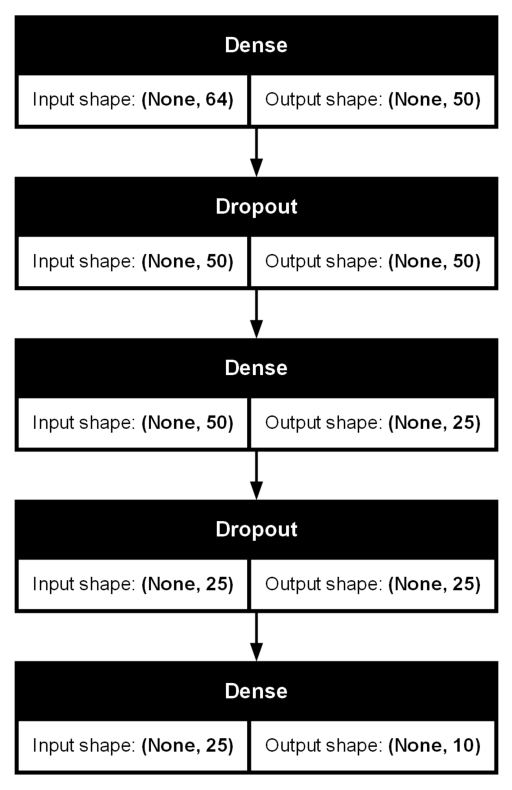

In [34]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

#绘制网络结构示意图
plot_model(DNN, to_file='DNN.png', show_shapes=True, show_layer_names=False,rankdir='TB')
plt.figure(figsize=(10, 10))
img=plt.imread('DNN.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [35]:
from keras.optimizers import RMSprop

#设置训练参数并进行训练
#设置学习率为0.001
DNN.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#进行20次训练，每批64个数据
DNN.fit(x_train, y_train, epochs=20, batch_size=64)


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0655 - loss: 7.1661    
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2647 - loss: 2.5696 
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6420 - loss: 1.6776 
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8421 - loss: 1.1172 
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9051 - loss: 0.8197 
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9230 - loss: 0.6870 
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9228 - loss: 0.6238 
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9261 - loss: 0.5789 
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9465 - loss: 0.5122 
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9738 - loss: 0.4514 
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9732 - loss: 0.4269 
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

#进行模型评估
train_loss, train_acc = DNN.evaluate(x_train, y_train, batch_size=64)
print(f"训练集损失函数{train_loss:.4f},准确率{train_acc * 100:.2f}%")
test_loss, test_acc = DNN.evaluate(x_test, y_test, batch_size=64)
print(f"测试集损失函数：{test_loss:.4f},准确率：{test_acc * 100:.2f}%")
y_pred = DNN.predict(x_test).argmax(axis=-1)
y_true = y_test.argmax(axis=-1)
print("-----分类报告如下-----")
print(classification_report(y_true, y_pred))
print("混淆矩阵如下")
cm=confusion_matrix(y_true, y_pred)
print(cm)
print("-----网络报告如下-----")
print(DNN.summary())

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.9940 - loss: 0.2835
训练集损失函数0.2876,准确率99.51%
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9674 - loss: 0.3796 
测试集损失函数：0.3713,准确率：97.22%
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
-----分类报告如下-----
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.92      1.00      0.96        33
           2       1.00      1.00      1.00        42
           3       0.97      0.94      0.96        35
           4       0.97      0.94      0.96        35
           5       1.00      0.97      0.99        38
           6       1.00      0.97      0.99        36
           7       0.95      0.97      0.96        40
           8       0.97      0.95      0.96        38
           9       0.94      1.00      0.97        33

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.9

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,572 (37.39 KB)

 Trainable params: 4,785 (18.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,787 (18.70 KB)

None


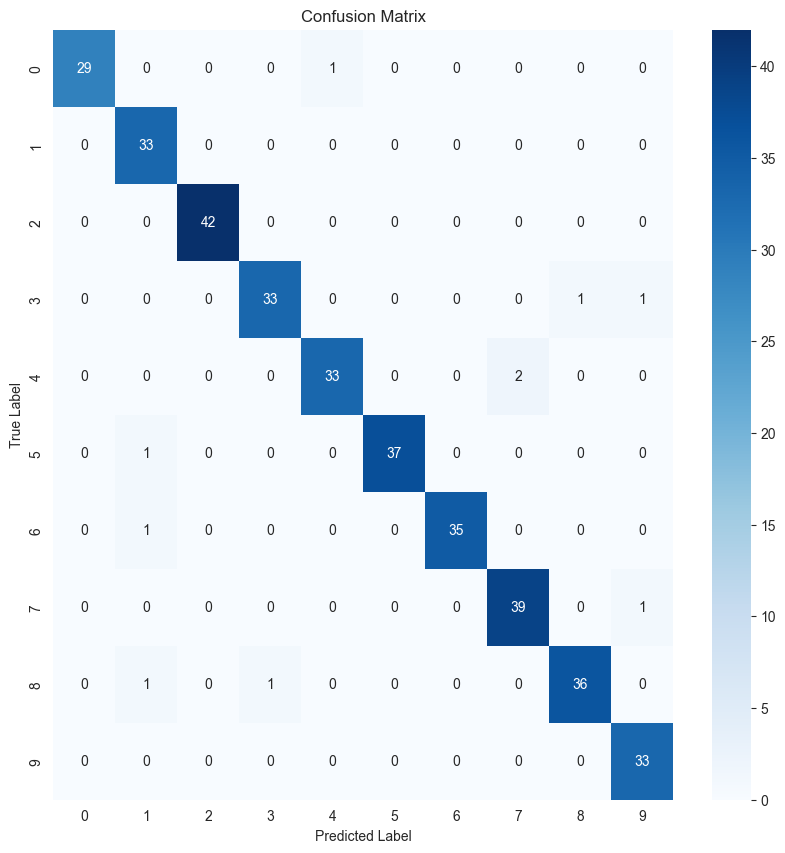

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 绘制混淆矩阵的热力图
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

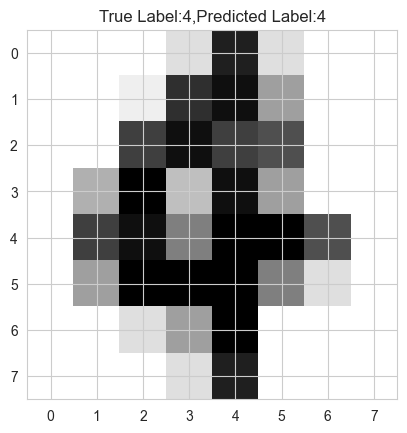

0


In [38]:
import matplotlib.pyplot as plt
import numpy as np

#随机展示一个样例
index = np.random.randint(0, len(x_test))
sample = x_test[index]
sample = sample.reshape(8, 8)
plt.imshow(sample, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"True Label:{y_true[index]},Predicted Label:{y_pred[index]}")
plt.show()
print(np.argmax(y_pred[index]))

In [39]:
#测试完毕，保存网络模型
DNN.save('DNN.h5')